# Imports

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Data validation/analyse

In [220]:
df = pd.read_csv("banana_quality.csv")
df

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


In [201]:
arr = df.to_numpy()
X = arr[:, :-1]          # Features
y = arr.T[-1]  # Labels

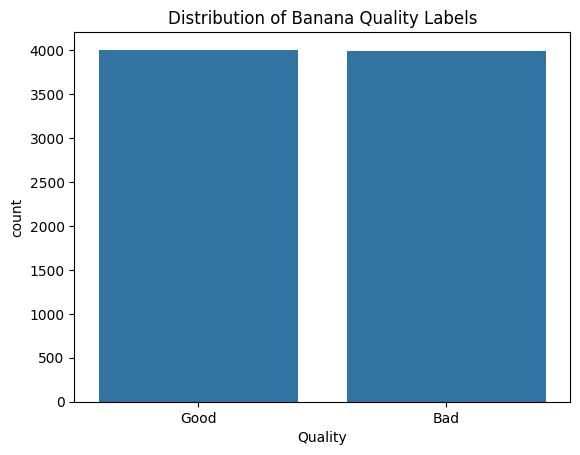

In [214]:
sns.countplot(x='Quality', data=df)
plt.title('Distribution of Banana Quality Labels')
plt.show()

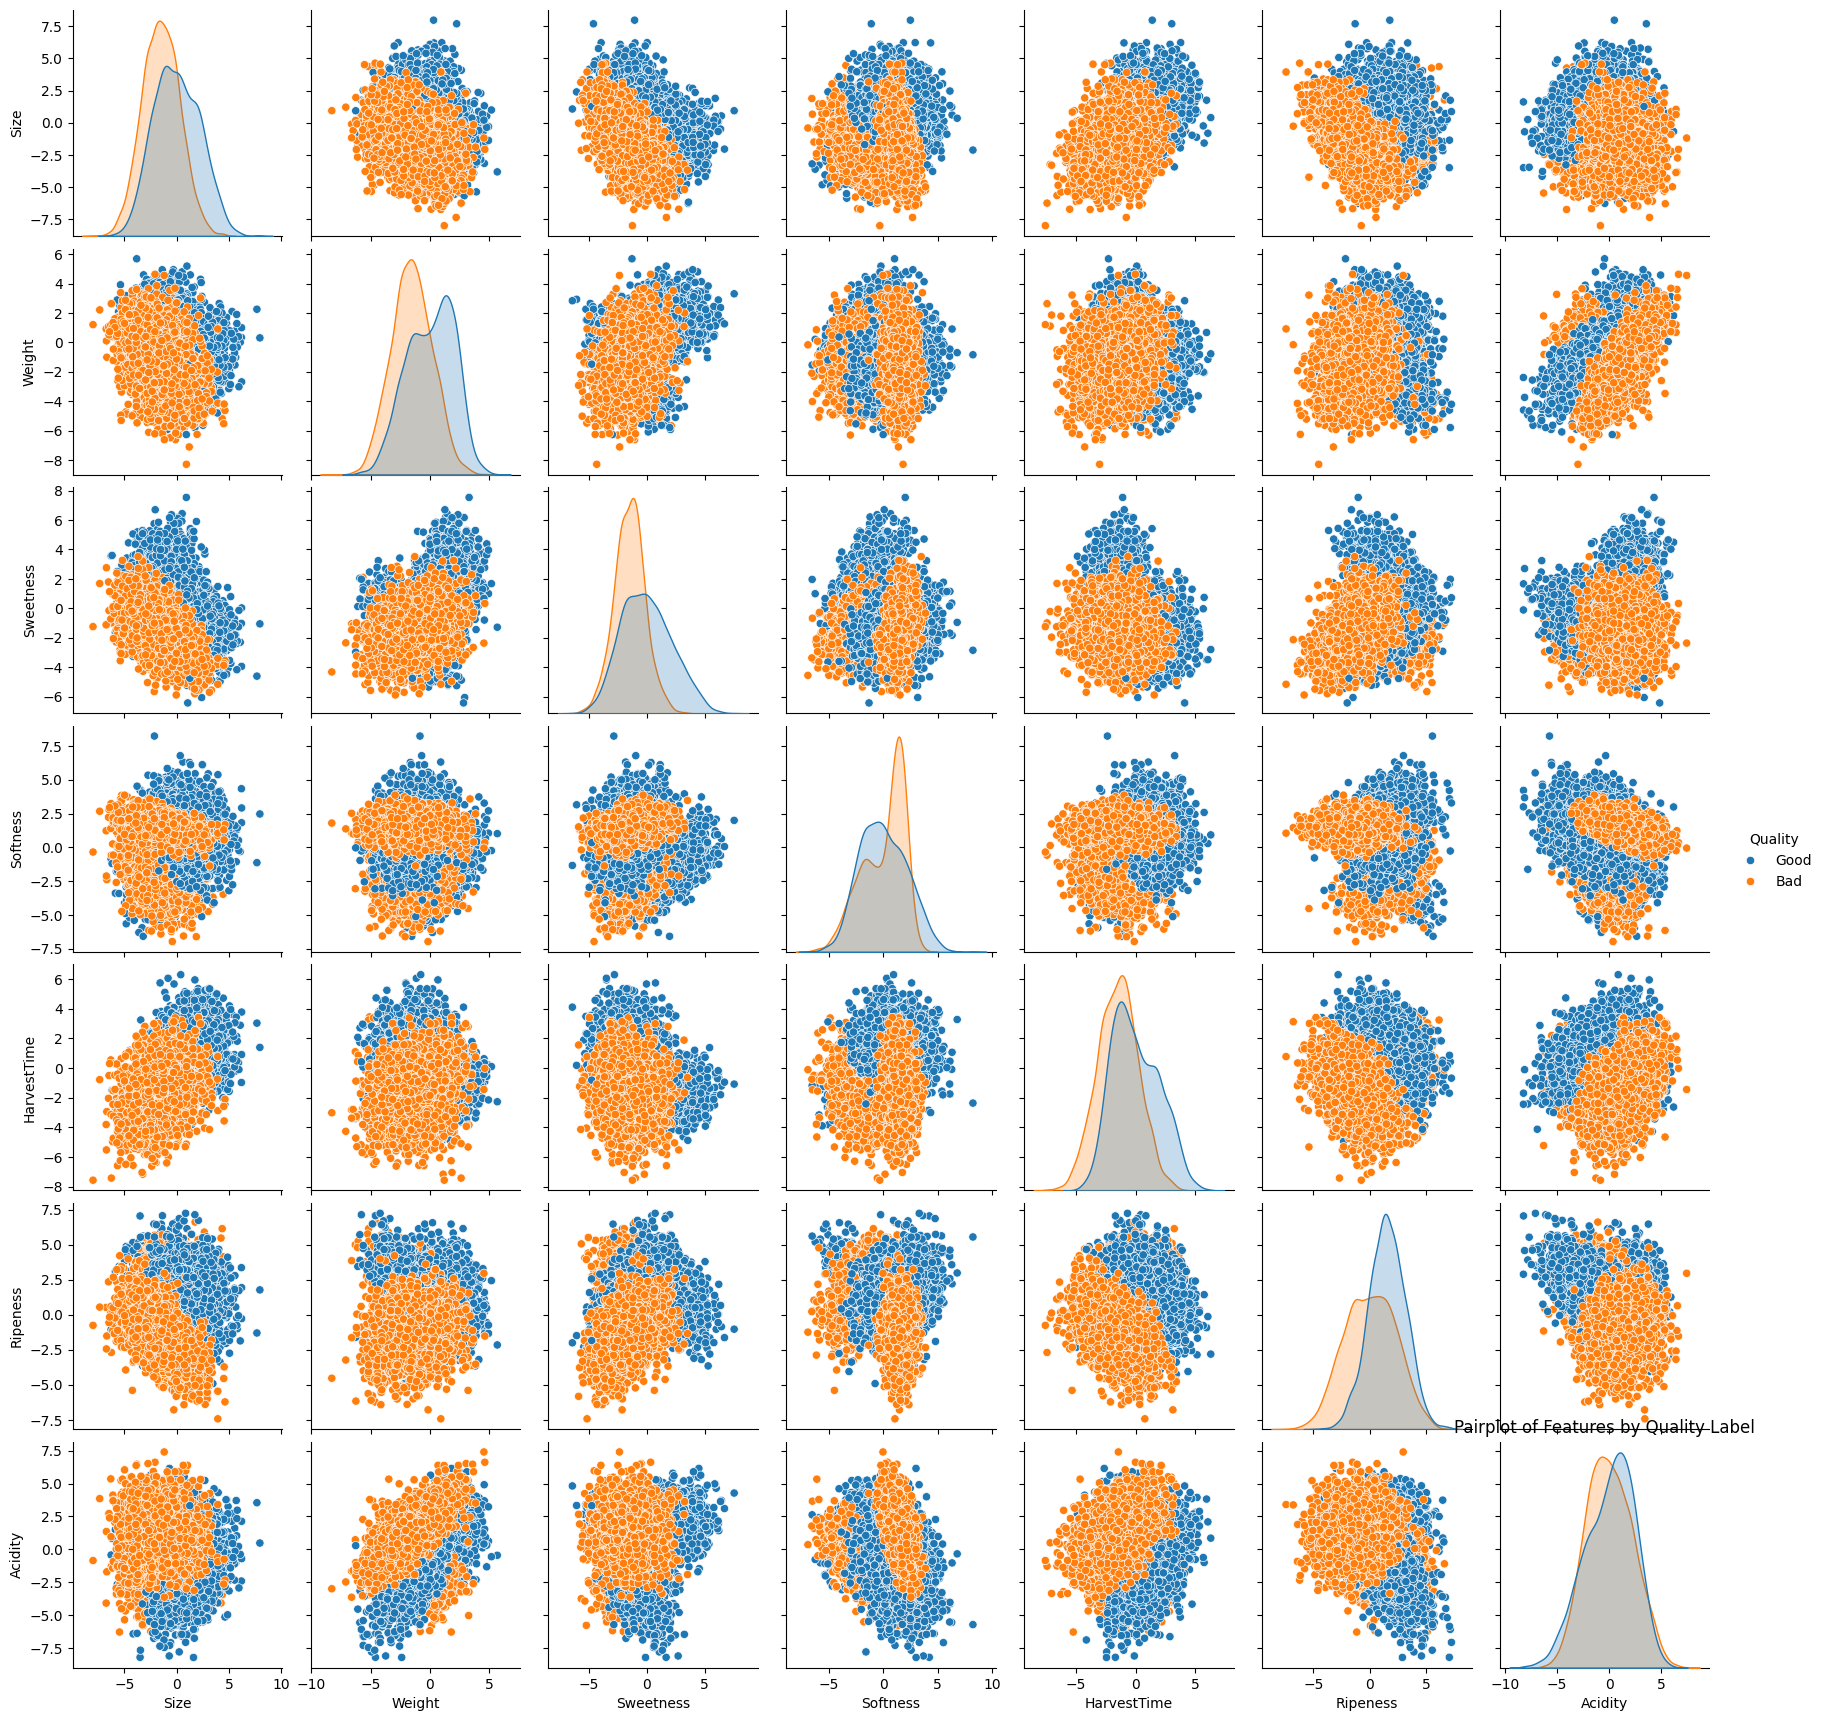

In [213]:
sns.pairplot(df, hue='Quality')
plt.title('Pairplot of Features by Quality Label')
plt.show()

# Train

In [202]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
# Create a k-nearest neighbors classifier (you can choose a different classifier based on your requirements)
mlp = MLPClassifier(hidden_layer_sizes=(128),random_state=1, max_iter=800)

# Train the classifier on the training data
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

Accuracy: 0.98625


# Evaluate the accuracy of the classifier

In [218]:
# Evaluate the classifier
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         Bad       0.99      0.98      0.99       781
        Good       0.99      0.99      0.99       819

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



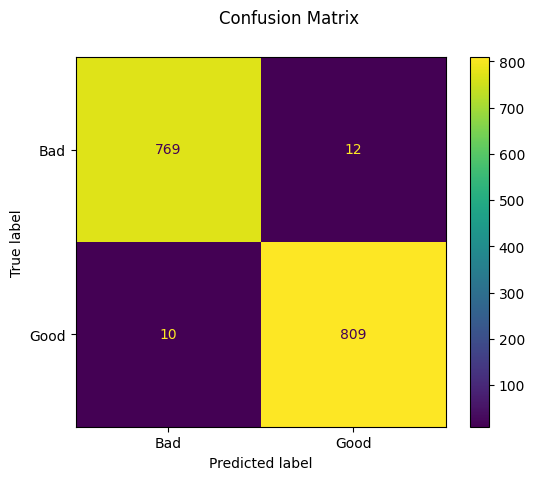

In [204]:
m = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
m.figure_.suptitle("Confusion Matrix")
plt.show()

# Save model

In [212]:
# Save the model to a file using pickle
with open('banana_quality.pkl', 'wb') as file:
    pickle.dump(mlp, file)
    print("Model saved successfully.")

Model saved successfully.
